**RHero** (https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)



## **1 - Imports**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **2 - Carregando Dataset**

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/RHero-UFRPE/RHero-ML/master/WA_Fn-UseC_-HR-Employee-Attrition.csv")
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## **3 - Dados Estatísticos**






#### **3.1 - Sobre todo o dataset.**

In [4]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### **3.2 - Dados mais específicos.**

In [5]:
print('-> Dados Estatísticos: Age X JobStisfaction')
print('\nJobSatisfaction\n',dataset['JobSatisfaction'].describe())
print('\nAge\n', dataset['Age'].describe())

-> Dados Estatísticos: Age X JobStisfaction

JobSatisfaction
 count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

Age
 count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


In [6]:
print('-> Dados Estatísticos: EducationField X JobRole')
print('\nJobSatisfaction\n',dataset['EducationField'].describe())
print('\nAge\n', dataset['JobRole'].describe())

-> Dados Estatísticos: EducationField X JobRole

JobSatisfaction
 count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object

Age
 count                1470
unique                  9
top       Sales Executive
freq                  326
Name: JobRole, dtype: object


In [7]:
print('-> Dados Estatísticos: JobSatisfaction X Attrition')
print('\nJobSatisfaction\n',dataset['JobSatisfaction'].describe())
print('\nAge\n', dataset['Attrition'].describe())

-> Dados Estatísticos: JobSatisfaction X Attrition

JobSatisfaction
 count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

Age
 count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object


## **4 - Gráficos**

#### **4.1 - Gráfico da coluna 'Gender' (Usando o matplotlib)** 

In [8]:
labels = dataset['Gender'].unique()
labels

array(['Female', 'Male'], dtype=object)

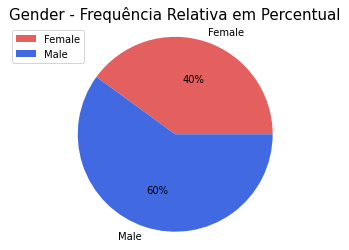

In [9]:
qnt_female = dataset.query('Gender == "Female"').Gender.count()
qnt_male = dataset.query('Gender == "Male"').Gender.count()
gender_labels = ['Female','Male']

plt.pie([qnt_female,qnt_male], labels = gender_labels, autopct='%1.f%%', colors= ["#e4605e", '#4169e1'])
plt.axis('equal')
plt.title("Gender - Frequência Relativa em Percentual", fontsize = 15)
plt.legend()
plt.show()



#### **4.2 - Gráfico da coluna 'Attrition' (Usando o seaborn)** 

Attrition Yes: 237 casos
Attrition No: 1233 casos


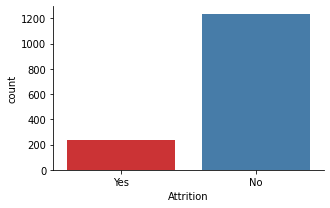

In [10]:
attrition_true=len(dataset[dataset.Attrition=="Yes"])
attrition_false=len(dataset[dataset.Attrition=="No"])

print("Attrition Yes: " + str(attrition_true) + " casos")
print("Attrition No: "+ str(attrition_false) + " casos")
g = sns.catplot(x="Attrition", data=dataset, kind="count", height=3, aspect=1.5, palette="Set1");


#### **4.3 - Gráfico da coluna 'Gender' relacionando com 'Attrition' (Usando o seaborn)** 

Attrition
Gender Attrition           
Female No               501
       Yes               87
Male   No               732
       Yes              150

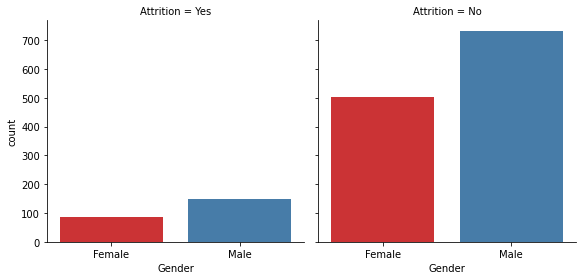

In [11]:
g = sns.catplot(x="Gender",col="Attrition", data=dataset, kind="count",
                height=4, aspect=1, palette="Set1");
                
grouped_keys = dataset[['Attrition']].groupby([dataset['Gender'], dataset['Attrition']])
grouped_keys.count()


# **5 - Análise Exploratória de Dados**



#### **5.1 Análise Descritiva das variáveis**







In [12]:
%matplotlib inline
py.init_notebook_mode(connected=True)


In [13]:
variaveis = pd.read_csv("https://raw.githubusercontent.com/RHero-UFRPE/RHero-ML/entrega_quatro/classificacao_variaveis.csv")

print('Classificação dos atributos do dataset\n 1 - Quantitativa discreta\n 2 - Quantitativa contínua\n 3 - Qualitativa nominal\n 4 - Qualitativa ordinal\n\n', variaveis)

Classificação dos atributos do dataset
 1 - Quantitativa discreta
 2 - Quantitativa contínua
 3 - Qualitativa nominal
 4 - Qualitativa ordinal

                     Atributo  Classificacao
0                        Age              1
1                  Attrition              3
2             BusinessTravel              4
3                  DailyRate              1
4                 Department              4
5           DistanceFromHome              1
6                  Education              1
7             EducationField              3
8              EmployeeCount              1
9             EmployeeNumber              1
10   EnvironmentSatisfaction              1
11                    Gender              3
12                HourlyRate              1
13            JobInvolvement              1
14                  JobLevel              1
15                   JobRole              3
16           JobSatisfaction              1
17             MaritalStatus              3
18             Mont

#### **5.1.1 - Frequência Absoluta das variáveis**

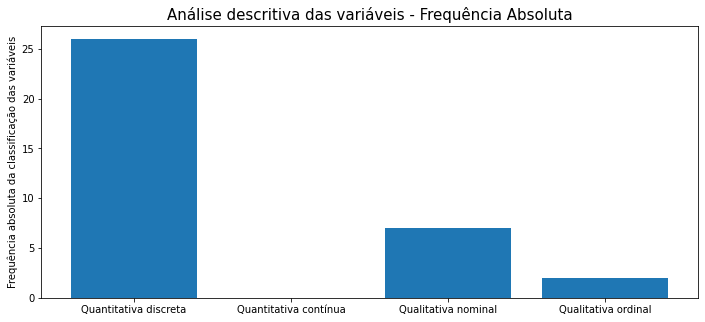

In [14]:
quantitativa_discreta = variaveis.query('Classificacao == 1').Classificacao.count()
quantitativa_continua = variaveis.query('Classificacao == 2').Classificacao.count()
qualitativa_nominal= variaveis.query('Classificacao == 3').Classificacao.count()
qualitativa_ordinal= variaveis.query('Classificacao == 4').Classificacao.count()


names = ['Quantitativa discreta', 'Quantitativa contínua', 'Qualitativa nominal', 'Qualitativa ordinal']
qtd = [quantitativa_discreta, quantitativa_continua, qualitativa_nominal, qualitativa_ordinal]
total = sum(qtd)

plt.figure(figsize=(40, 5))

plt.subplot(131)
plt.bar(names,qtd)
plt.title('Análise descritiva das variáveis - Frequência Absoluta', fontsize = 15)
plt.ylabel('Frequência absoluta da classificação das variáveis')
plt.show()

#### **5.1.2 - Frequência Relativa das variáveis**

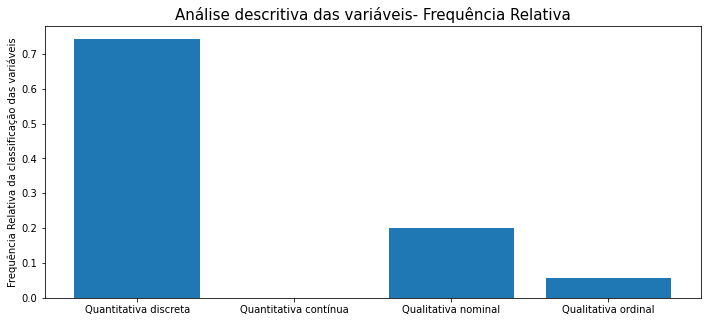

In [15]:
frequencia_relativa_QD = quantitativa_discreta / total
frequencia_relativa_QC = quantitativa_continua / total
frequencia_relativa_QTN = qualitativa_nominal / total
frequencia_relativa_QTO = qualitativa_ordinal / total

prova = frequencia_relativa_QD + frequencia_relativa_QC + frequencia_relativa_QTN + frequencia_relativa_QTO
qtd_relativas = [frequencia_relativa_QD, frequencia_relativa_QC, frequencia_relativa_QTN, frequencia_relativa_QTO]
plt.figure(figsize=(40, 5))

plt.subplot(131)
plt.bar(names, qtd_relativas)
plt.title('Análise descritiva das variáveis- Frequência Relativa', fontsize = 15)
plt.ylabel('Frequência Relativa da classificação das variáveis')
plt.show()

#### **5.1.3 - Frequência Relativa Percentual das variáveis**

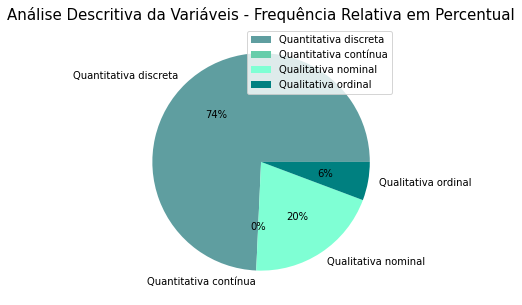

In [16]:
frequencia_relativa_QD = quantitativa_discreta / total
frequencia_relativa_QC = quantitativa_continua / total
frequencia_relativa_QTN = qualitativa_nominal / total
frequencia_relativa_QTO = qualitativa_ordinal / total

prova = frequencia_relativa_QD + frequencia_relativa_QC + frequencia_relativa_QTN + frequencia_relativa_QTO
qtd_relativas = [frequencia_relativa_QD, frequencia_relativa_QC, frequencia_relativa_QTN, frequencia_relativa_QTO]
plt.figure(figsize=(40, 5))

plt.pie([frequencia_relativa_QD, frequencia_relativa_QC, frequencia_relativa_QTN, frequencia_relativa_QTO], labels = names, autopct='%1.f%%', colors= ["#5F9EA0", '#66CDAA', '#7FFFD4', '#008080'])
plt.title("Análise Descritiva da Variáveis - Frequência Relativa em Percentual", fontsize = 15)
plt.legend()
plt.show()

### **5.2 Análise sobre a variável Attrition**

#### **5.2.1 - Frequência Absoluta**

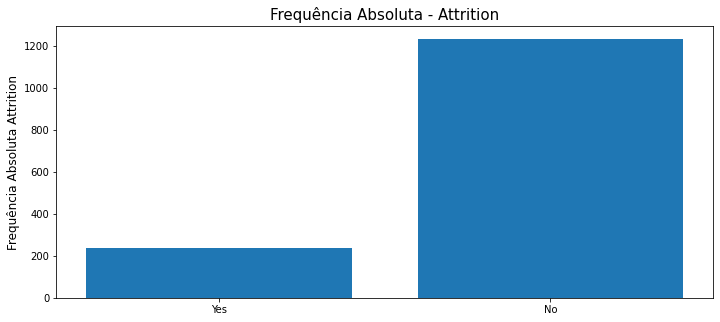

In [17]:
attrition_yes = dataset.query('Attrition == "Yes"').Attrition.count()
attrition_No = dataset.query('Attrition == "No"').Attrition.count()

name_attrition = ['Yes', 'No']
qtd_attrition = [attrition_yes,attrition_No]

plt.figure(figsize=(40, 5))

plt.subplot(131)
plt.bar(name_attrition, qtd_attrition)
plt.title('Frequência Absoluta - Attrition', fontsize = 15)
plt.ylabel('Frequência Absoluta Attrition', fontsize = 12)
plt.show()

#### **5.2.2 - Frequência Relativa**

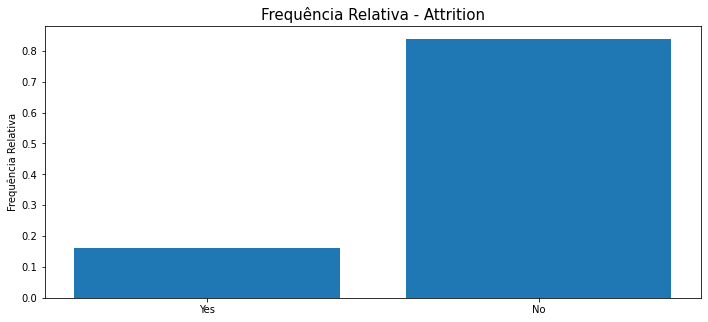

In [18]:
total_att = attrition_yes + attrition_No

at_yes_rlt = attrition_yes / total_att
at_No_rlt = attrition_No / total_att

qtd_att = [at_yes_rlt, at_No_rlt]
name_att = ['Yes', 'No']

plt.figure(figsize=(40, 5))

plt.subplot(131)
plt.bar(name_att, qtd_att)
plt.title('Frequência Relativa - Attrition', fontsize = 15)
plt.ylabel('Frequência Relativa')
plt.show()

#### **5.2.3 - Frequência Relativa Percentual**



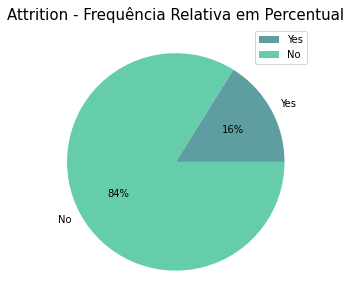

In [19]:
total_att = attrition_yes + attrition_No

at_yes_rlt = attrition_yes / total_att
at_No_rlt = attrition_No / total_att

qtd_att = [at_yes_rlt, at_No_rlt]
name_att = ['Yes', 'No']

plt.figure(figsize=(40, 5))

plt.pie([at_yes_rlt, at_No_rlt], labels = name_att, autopct='%1.f%%', colors= ["#5F9EA0", '#66CDAA'])
plt.title("Attrition - Frequência Relativa em Percentual", fontsize = 15)
plt.legend()
plt.show()

### **5.3 Análise sobre a variável Attrition x Outras variáveis**

#### **5.3.1 - Frequência Relativa Percentual da variável *Education***

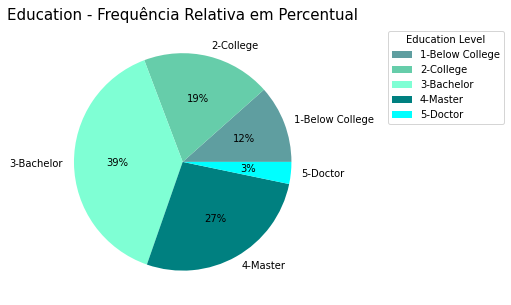

In [20]:
edu_BC = dataset.query('Education == 1').Education.count()
edu_C = dataset.query('Education == 2').Education.count()
edu_B= dataset.query('Education == 3').Education.count()
edu_M= dataset.query('Education == 4').Education.count()
edu_D= dataset.query('Education == 5').Education.count()


names_education = ['1-Below College', '2-College', '3-Bachelor', '4-Master', '5-Doctor']


plt.figure(figsize=(40, 5))

plt.pie([edu_BC, edu_C, edu_B, edu_M, edu_D], labels = names_education, autopct='%1.f%%', colors= ["#5F9EA0", '#66CDAA', '#7FFFD4', '#008080', '#00FFFF'])
plt.title("Education - Frequência Relativa em Percentual", fontsize = 15)
plt.legend(title = 'Education Level', bbox_to_anchor=(1, 0, 0.70, 1))
plt.show()

#### **5.3.2 - *Attrition* x *Education***

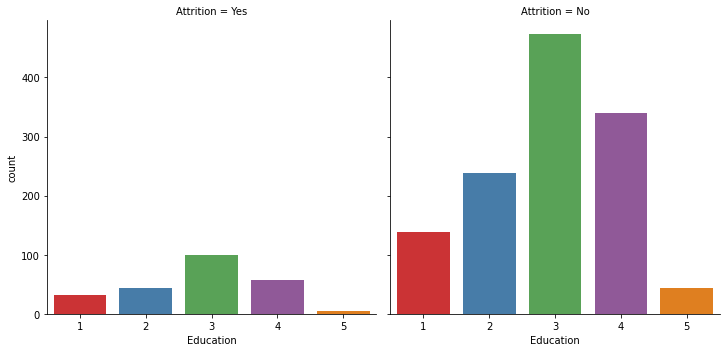

In [21]:
Attrition_Educacional_Level = sns.catplot(x="Education", col='Attrition', data=dataset, kind="count",orient='h', height=5, aspect=1, palette="Set1");

#### **5.3.3 - Frequência Relativa Percentual da variável *Environment Satisfaction***

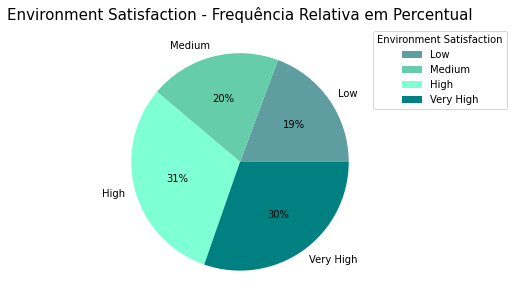

In [22]:
low = dataset.query('EnvironmentSatisfaction == 1').EnvironmentSatisfaction.count()
medium = dataset.query('EnvironmentSatisfaction == 2').EnvironmentSatisfaction.count()
high = dataset.query('EnvironmentSatisfaction == 3').EnvironmentSatisfaction.count()
very_high= dataset.query('EnvironmentSatisfaction == 4').EnvironmentSatisfaction.count()


names_education = ['Low', 'Medium', 'High', 'Very High']


plt.figure(figsize=(40, 5))

plt.pie([low, medium, high, very_high] , labels = names_education, autopct='%1.f%%', colors= ["#5F9EA0", '#66CDAA', '#7FFFD4', '#008080', '#00FFFF'])
plt.title("Environment Satisfaction - Frequência Relativa em Percentual", fontsize = 15)
plt.legend(title = 'Environment Satisfaction', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### **5.3.4 - *Attrition* x *Environment Satisfaction***

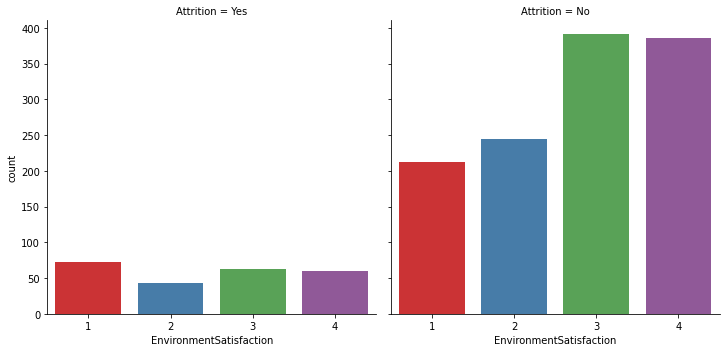

In [23]:
Attrition_EnvironmentSatisfaction = sns.catplot(x="EnvironmentSatisfaction",col="Attrition", data=dataset, kind="count",height=5, aspect=1, palette="Set1" );

#### **5.3.3 - *Attrition* x *Job Satisfaction***

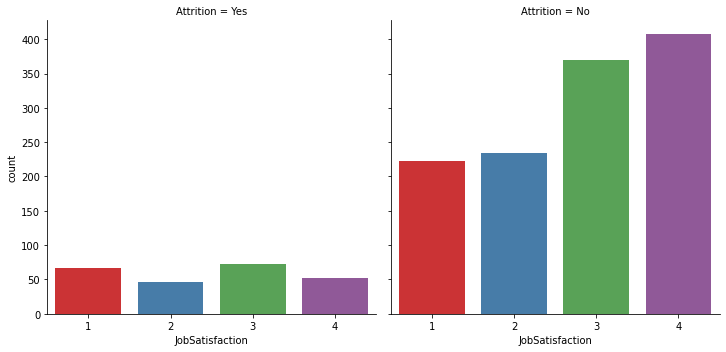

In [24]:
Attrition_JobStisfaction = sns.catplot(x="JobSatisfaction",col="Attrition", data=dataset, kind="count",height=5, aspect=1, palette="Set1" );

#### **5.3.5 - *Attrition* x *Years At Company***

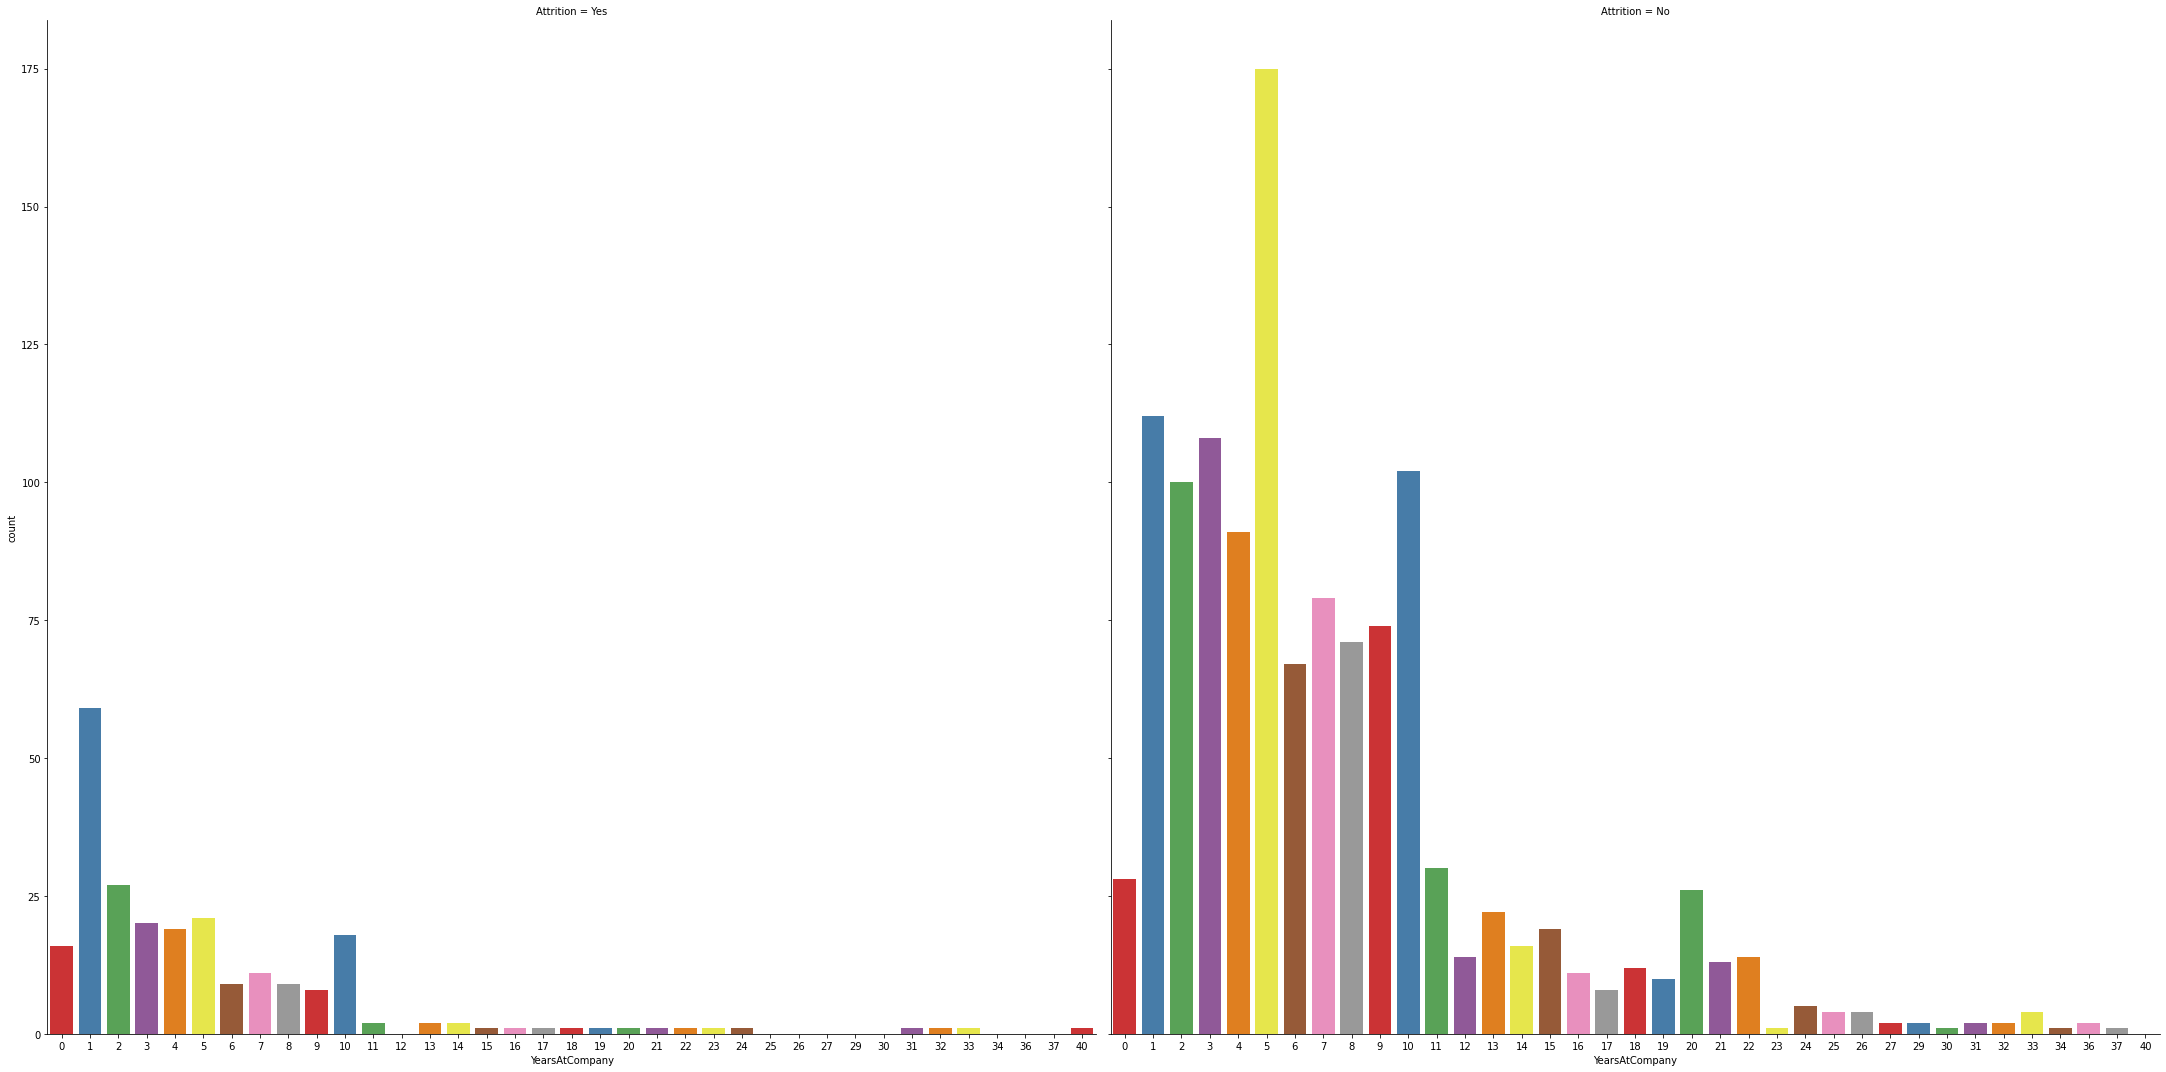

In [25]:
Attrition_Years = sns.catplot(x="YearsAtCompany", col='Attrition', data=dataset, kind="count",orient='h', height=15, aspect=1, palette="Set1");